# Tensorflow tutorial

In this tutorial we will cover some of the basic consepts of optimization using [tensorflow](https://www.tensorflow.org/) machine learning library.

some usefull links:  
1. tensorflow guides: https://www.tensorflow.org/guide/basics
2. tensorflow tutorials: https://www.tensorflow.org/tutorials/keras/classification

## 1. Gradient Decent

**Gradient Desent (GD)** is a interative method to find a minimum of a **convex function**.

**Gradient descent** is one of the most popular algorithms to perform optimization and by far the most common way to optimize neural networks.

In machine learnin, Gradient descent is a way to minimize an objective function whit respect to model’s parameters by updating the parameters in the opposite direction of the gradient of the objective function w.r.t. to the parameters.

<figure>
  <img style="float: left;" src="./figures/gd.png" width="400"/>
</figure>

In gradient decent we change the value of the paremets as follow:
    $$ w = w -  ∇_w Loss$$

### Simple example
in the following example we will find the minimum of a function using gradient decent.

In [52]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [53]:
def f(x):
    """
    A convex function
    f(x) = (x-5)^2
    """
    y = x**2 - 10*x + 25
    return y

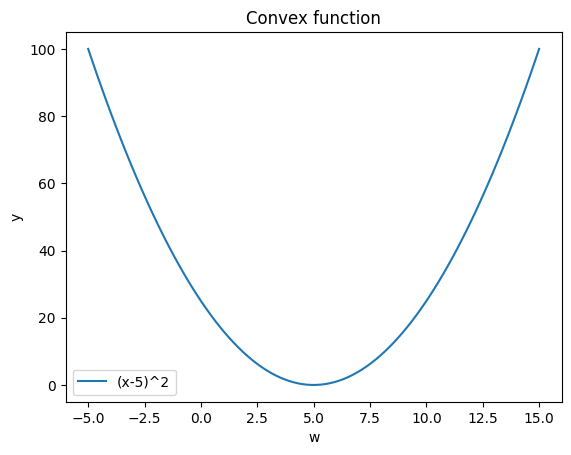

In [54]:
x = np.linspace(-5, 15,100)

plt.figure()
plt.plot(x, f(x), label = "(x-5)^2")
plt.legend()
plt.title("Convex function")
plt.ylabel("y")
plt.xlabel("w")
plt.show()
plt.close()

using tensorflow we can get the gradient of the function at a given point

In [55]:
weight_var = tf.Variable(1.0)

with tf.GradientTape() as tape:
    y = f(weight_var)

gradient_w =  tape.gradient(y, weight_var)

In [56]:
print("gradient ∇f(x)|x=1 using tensorflow: ", gradient_w.numpy() )

gradient ∇f(x)|x=1 using tensorflow:  -8.0


In [59]:
def g(x):
    """
    gradient of f(x).
    g(x) = d(f(x))/dx = 2*(x-5)
    """
    dydx = 2*(x-5)
    return dydx

In [60]:
print("gradient ∇f(w)|w=1 using theoritical gradient: ", g(1.0) )
print("gradient ∇f(w)|w=1 using tensorflow: ", gradient_w.numpy() )

gradient ∇f(w)|w=1 using theoritical gradient:  -8.0
gradient ∇f(w)|w=1 using tensorflow:  -8.0


So if we want to update our paramter w to find the minimum of the function we can apply the following formula:  $$ w = w -  ∇_w Loss$$

In [61]:
weight_new = weight_var - 0.1 * gradient_w.numpy()

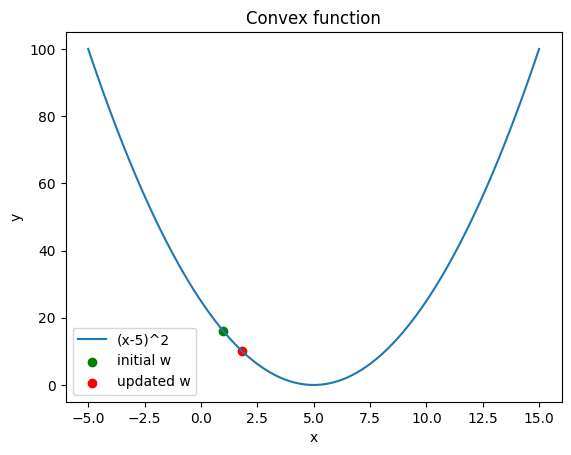

In [62]:
plt.figure()
plt.plot(x, f(x), label = "(x-5)^2")
plt.scatter(weight_var, f(weight_var), color= "green", label = "initial w")
plt.scatter(weight_new, f(weight_new), color="red", label = "updated w")
plt.legend()
plt.title("Convex function")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()

### Apply gradient decent algorith

![gd.png](./figures/gd_algo.png) 

In [65]:
# inputs
weight_var = tf.Variable(-3.0)
lr = 0.1
step_max = 500
thr = 0.01

# algorith
weight_var = tf.Variable(-3.0)
w_history = [weight_var.numpy()]

step = 0
while ( f(weight_var) > thr ) and (step < step_max):
    
    # step 1 get the grandient
    with tf.GradientTape() as tape:
        y = f(weight_var)

    # get gradient
    gradient_x =  tape.gradient(y, weight_var)
    
    # w  = w  - lr * gradient_L(w)
    weight_var.assign_sub(lr * gradient_x)
    
    # just keep the values of x
    w_history += [weight_var.numpy()]
    
    step = step +1
w_history = np.array(w_history)

In [66]:
print("total steps:", step)

total steps: 20


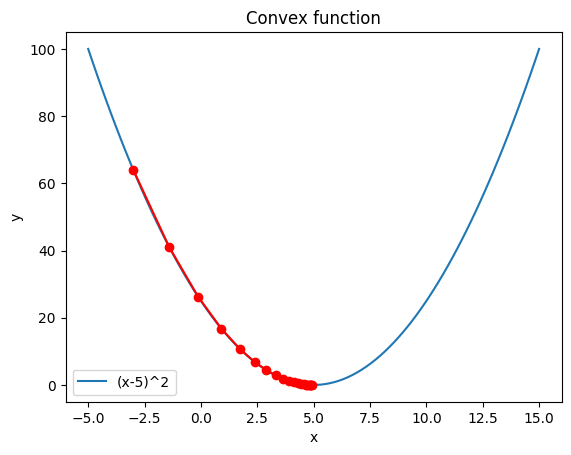

In [67]:
w = np.linspace(-5, 15,100)

plt.figure()
plt.plot(w, f(w), label = "(x-5)^2")
plt.plot(w_history, f(w_history),marker = "o", color="r")
plt.legend()
plt.title("Convex function")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()

### lr = 0.001

In [68]:
# inputs
weight_var = tf.Variable(-3.0)
lr = 0.001
step_max = 500
thr = 0.01

# algorith
weight_var = tf.Variable(-3.0)
w_history = [weight_var.numpy()]

step = 0
while ( f(weight_var) > thr ) and (step < step_max):
    
    # step 1 get the grandient
    with tf.GradientTape() as tape:
        y = f(weight_var)

    # get gradient
    gradient_x =  tape.gradient(y, weight_var)
    
    # x_var = x_var - lr * gradient_x
    weight_var.assign_sub(lr * gradient_x)
    
    # just keep the values of x
    w_history += [weight_var.numpy()]
    
    step = step +1
w_history = np.array(w_history)

In [69]:
print("total steps:", step)

total steps: 500


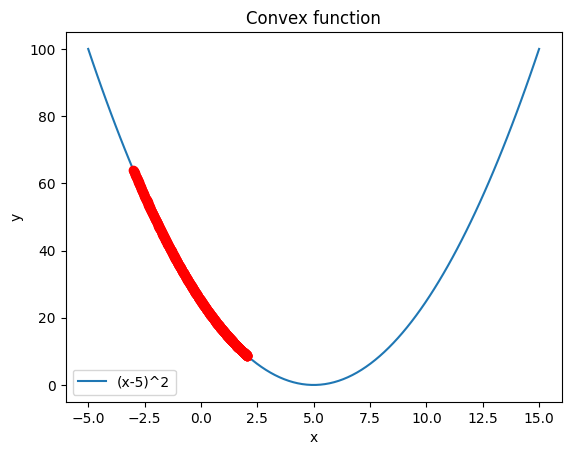

In [70]:
w = np.linspace(-5, 15,100)

plt.figure()
plt.plot(w, f(w), label = "(x-5)^2")
plt.plot(w_history, f(w_history),marker = "o", color="r")
plt.legend()
plt.title("Convex function")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()

### lr = 1.0

In [81]:
# inputs
weight_var = tf.Variable(-3.0)
lr = 1.0
step_max = 500
thr = 0.01

# algorith
weight_var = tf.Variable(-3.0)
w_history = [weight_var.numpy()]

step = 0
while ( f(weight_var) > thr ) and (step < step_max):
    
    # step 1 get the grandient
    with tf.GradientTape() as tape:
        y = f(weight_var)

    # get gradient
    gradient_x =  tape.gradient(y, weight_var)
    
    # x_var = x_var - lr * gradient_x
    weight_var.assign_sub(lr * gradient_x)
    
    # just keep the values of x
    w_history += [weight_var.numpy()]
    
    step = step +1
w_history = np.array(w_history)

In [83]:
gradient_x

<tf.Tensor: shape=(), dtype=float32, numpy=16.0>

In [82]:
print("maximum step reached:",step)

maximum step reached: 500


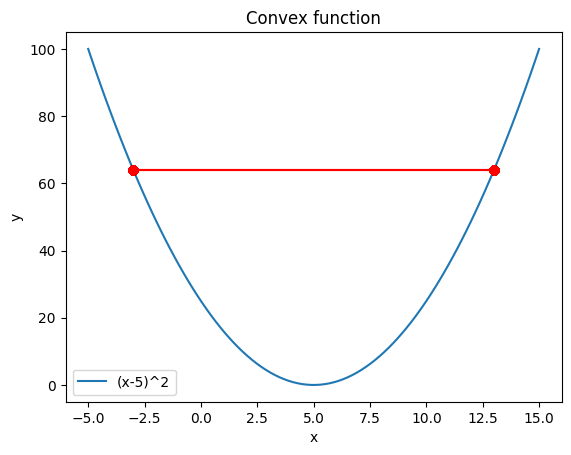

In [73]:
w = np.linspace(-5, 15,100)

plt.figure()
plt.plot(w, f(w), label = "(x-5)^2")
plt.plot(w_history, f(w_history),marker = "o", color="r")
plt.legend()
plt.title("Convex function")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()

In [74]:
w_history

array([-3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3.,
       13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13.,
       -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3.,
       13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13.,
       -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3.,
       13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13.,
       -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3.,
       13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13.,
       -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3.,
       13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13.,
       -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3.,
       13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13.,
       -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3.,
       13., -3., 13., -3., 13., -3., 13., -3., 13., -3., 13., -3

# Exponential learning rate decay

In [75]:
def exponential_decay_lr(lr, step, decay_rate=0.1):
    tmp_lr = lr * np.exp(-decay_rate*step)
    return tmp_lr

In [76]:
steps = np.linspace(0,100,10)

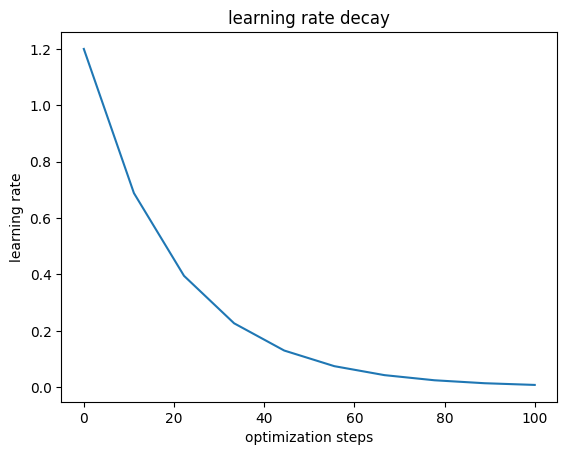

In [77]:
plt.figure()
plt.plot(steps,exponential_decay_lr(lr=1.2,step=steps,decay_rate = 0.05))
plt.xlabel("optimization steps")
plt.ylabel("learning rate")
plt.title("learning rate decay")
plt.show()
plt.close()

In [78]:
# inputs
weight_var = tf.Variable(-3.0)
lr = 1.0
step_max = 500
thr = 0.01

# algorith
weight_var = tf.Variable(-3.0)
w_history = [weight_var.numpy()]

step = 0
while ( f(weight_var) > thr ) and (step < step_max):
    # step 1 get the grandient
    with tf.GradientTape() as tape:
        y = f(weight_var)

    # get gradient
    gradient_w =  tape.gradient(y, weight_var)
    
    # x_var = x_var - lr * gradient_x
    tmp_lr = exponential_decay_lr(lr, step, decay_rate=0.01)
    weight_var.assign_sub(tmp_lr * gradient_w)
    
    # just keep the values of x
    w_history += [weight_var.numpy()]
    
    step = step +1
w_history = np.array(w_history)

In [79]:
print("Total steps:", step)

Total steps: 21


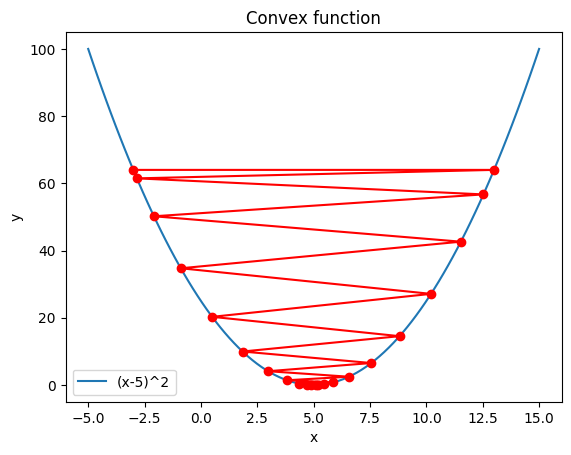

In [80]:
w = np.linspace(-5, 15,100)

plt.figure()
plt.plot(w, f(w), label = "(x-5)^2")
plt.plot(w_history, f(w_history),marker = "o", color="r")
plt.legend()
plt.title("Convex function")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()

# Load Adult dataset

tensorflow tutorial on training loops
https://www.tensorflow.org/guide/keras/writing_a_training_loop_from_scratch

In [84]:
from collections import OrderedDict

data_types = OrderedDict([
    ("age", "int"),
    ("workclass", "category"),
    ("final_weight", "int"),  # originally it was called fnlwgt
    ("education", "category"),
    ("education_num", "int"),
    ("marital_status", "category"),
    ("occupation", "category"),
    ("relationship", "category"),
    ("race", "category"),
    ("sex", "category"),
    ("capital_gain", "float"),  # required because of NaN values
    ("capital_loss", "int"),
    ("hours_per_week", "int"),
    ("native_country", "category"),
    ("income_class", "category"),
])
target_column = "income_class"

In [85]:
def read_dataset(path):
    return pd.read_csv(
        path,
        names=data_types,
        index_col=None,

        comment='|',  # test dataset has comment in it
        skipinitialspace=True,  # Skip spaces after delimiter
        na_values={
            'capital_gain': 99999,
            'workclass': '?',
            'native_country': '?',
            'occupation': '?',
        },
        dtype=data_types,
    )

def clean_dataset(data):
    # Test dataset has dot at the end, we remove it in order
    # to unify names between training and test datasets.
    data['income_class'] = data.income_class.str.rstrip('.').astype('category')
    
    # Remove final weight column since there is no use
    # for it during the classification.
    data = data.drop('final_weight', axis=1)
    
    # Duplicates might create biases during the analysis and
    # during prediction stage they might give over-optimistic
    # (or pessimistic) results.
    data = data.drop_duplicates()
    
    # Binary target variable (>50K == 1 and <=50K == 0)
    data[target_column] = (data[target_column] == '>50K').astype(int)
    
    # Categorical dataset
    categorical_features = data.select_dtypes('category').columns
    data[categorical_features] = data.select_dtypes('category').apply(lambda x: x.cat.codes)
    return data

In [86]:
import pandas as pd
# get and clean train dataset
TRAIN_DATA_FILE = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
train_data = clean_dataset(read_dataset(TRAIN_DATA_FILE))
train_data = train_data.dropna()
print("Train dataset shape:", train_data.shape)

# get and clean test dataset
TEST_DATA_FILE = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
test_data = clean_dataset(read_dataset(TEST_DATA_FILE))
test_data = test_data.dropna()
print("Test dataset shape:", test_data.shape)

Train dataset shape: (28938, 14)
Test dataset shape: (15175, 14)


In [87]:
target_column = "income_class"
features = train_data.columns.difference([target_column])
sensitive_feature = ["sex"]
non_sensitive_features = list(set(features).difference(set(sensitive_feature)))

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data[features], train_data[[target_column]], test_size=0.1)
X_test, y_test = test_data[features], test_data[[target_column]]

# Gradient decent on Machine learning

In machine learning we apply **Gradient Decent** method in order to **minimise the expexted loss** of the model using the **empirical risk minimization** because we dont know the acctual distibution of our data. 
$$ \min_{w} E_D[Loss]$$
$$ \min_{w} E_D[L(h(X;w), y)] = \min_{w} \dfrac{\sum_{i=1}^{n} L(h(x_i;w), y_i)}{n}$$
  

So we compute the grandient of the loss function with respect to the model parameter to find parameters of the model **w**. 

While in many cases the loss function in not convex several gradient decent optimizer usualy find a acceptable aproximation for a very different problem. Moreover different methos like advence optimizer trying to escape from local minima.

### Variants of  Gradient Decent

> 1. **Gradient Decent**   
In each step of the algorithm (updates of the model parameters), we estimate the gradient using the hole dataset : $E_D(L(h(D;w), Y))$
> 2. **Stochastic Gradient Decent**   
In each step of the algorithm (updates of the model parameters), we estimate the gradient using a single point dataset : $L(h(x;w), y)$. A hole pass of the datsaset D is called epoch.  
> 3. **Minibatch Stochastic Gradient Decent**    
In each step of the algorithm (updates of the model parameters), we estimate the gradient using a mini batch of the dataset : $E_D(L(h(batch_x; w), batch_y))$. A hole pass of the datsaset D is called epoch.

<figure>
  <img style="float: left;" src="./figures/nn_training_loop.png" width="600"/>
</figure>

# 1. Define Model using tensorflow

<figure>
  <img style="float: left;" src="./figures/DNN2.png" width="600"/>
</figure>

<figure>
  <img style="float: left;" src="./figures/neuron.png" width="600"/>
</figure>

In [89]:
input_layer = tf.keras.Input((13,))

layer_1_output = tf.keras.layers.Dense(64, activation='relu')(input_layer)

final_output = tf.keras.layers.Dense(1, activation='sigmoid')(layer_1_output) 

# sigmoid bound the output [0,1] to respesent propability.

# custruct graph
neural_network = tf.keras.Model(inputs=input_layer, outputs=final_output)

In [90]:
neural_network.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_4 (Dense)             (None, 64)                896       
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


# Cross entropy loss


Cross-entropy loss, or log loss, measures the performance of a classification


The **predicted probability** for each class $p(\hat{y_i} | x_i)$ is compared to the **actual class** $y_ i$ and a loss is calculated that penalizes the probability based on how far it is from the actual class.


**Cross entropy loss** minimize the negative log of the $p(\hat{y_i} | x; w)$:

$$  L = \sum_{i=1}^{C}  - y_i log( p(\hat{y_i} | x_i) ) $$ 


In the case of binary classification this is reduced to the following formula:

$$  L(x,y) = \sum_{i=1}^{2}  - y_i log( p(\hat{y_i} | x_i) ) $$


$$ = - y_1 log( p(\hat{y_1} | x_i) ) - y_2 log( p(\hat{y_2} | x_i) ) $$

$$ = - y_1 log( p(\hat{y_1} | x_i) ) - (1-y_1) log( 1 - p(\hat{y_1} | x_i) ) $$

$$\min_{w} \dfrac{\sum_{i=1}^{n} L(h(x_i;w), y_i)}{n}$$

# Training loops for neural networks

<figure>
  <img style="float: left;" src="./figures/nn_training_loop.png" width="600"/>
</figure>

In [94]:
lr = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
batch_size = 256
loss_fn = tf.keras.losses.BinaryCrossentropy()

In [95]:
@tf.function
def training_step(model, input_data):
    
    x_batch_train, y_batch_train = input_data
    
    with tf.GradientTape() as tape:
        prob = model(x_batch_train, training=True)
        loss = loss_fn(y_batch_train, prob)
    
    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    
    return loss

In [96]:
@tf.function
def validation_step(model, input_data):
    x_batch_train, y_batch_train = input_data
    output = model(x_batch_train, training=False)
    val_loss = loss_fn(y_batch_train, output)
    return val_loss

In [97]:
x_tf_dataset = tf.data.Dataset.from_tensor_slices(X_train)
y_tf_dataset = tf.data.Dataset.from_tensor_slices(y_train)
train_tf_dataset = tf.data.Dataset.zip((x_tf_dataset, y_tf_dataset))
train_tf_dataset = train_tf_dataset.shuffle(buffer_size=1000).batch(8)

val_x_tf_dataset = tf.data.Dataset.from_tensor_slices(X_val)
val_y_tf_dataset = tf.data.Dataset.from_tensor_slices(y_val)
val_tf_dataset = tf.data.Dataset.zip((val_x_tf_dataset,val_y_tf_dataset))
val_tf_dataset = val_tf_dataset.batch(8)

In [98]:
init_patient = 10

best_val_loss = np.inf
epochs = 50

# in each epoch we iterate all over the dataset
patient = init_patient
history = {"loss":[],
           "val_loss": []}
for epoch in range(epochs):
    print("\n--------\nStart of epoch :", epoch)
    
    # -------------------- Train ----------------------------
    mean_loss = 0
    
    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_tf_dataset):
        # training step : update the model on minibatch and get the loss
        loss = training_step(neural_network, input_data = (x_batch_train, y_batch_train))
        
        # monitor accumulative mean loss
        mean_loss = (step * mean_loss + loss.numpy())/(step+1)
        
        
    history["loss"].append(mean_loss)
    print("Online training loss: ", round(mean_loss,7) )
    
    
    
    
    # -------------------- Validation ------------------------
    # after each epoch we compute the validation error
    val_loss = validation_step(neural_network, (X_val,y_val)).numpy()
    history["val_loss"].append(val_loss)
    print("Validation loss: ", val_loss)
    
    
    # -------------------- Stoping critirio ------------------
    if val_loss < best_val_loss:
        # if val is descresing we can wait for some more epochs
        best_val_loss = val_loss
        patient = init_patient
        print("We find a better validation loss")
    else:
        # if val loss is not descresing our patient decrease
        patient = patient - 1
        
    # we dont have no increasing validation loss so we stop
    if patient == 0:
        print("We have no increasing val loss: ", val_loss)
        break


--------
Start of epoch : 0
Online training loss:  2.5521115
Validation loss:  1.0738977
We find a better validation loss

--------
Start of epoch : 1
Online training loss:  1.6053231
Validation loss:  0.5854834
We find a better validation loss

--------
Start of epoch : 2
Online training loss:  1.6332804
Validation loss:  0.893095

--------
Start of epoch : 3
Online training loss:  1.4583827
Validation loss:  1.7571884

--------
Start of epoch : 4
Online training loss:  1.3782512
Validation loss:  1.0785272

--------
Start of epoch : 5
Online training loss:  1.2415493
Validation loss:  0.61625

--------
Start of epoch : 6
Online training loss:  1.0638066
Validation loss:  0.594183

--------
Start of epoch : 7
Online training loss:  1.1073598
Validation loss:  0.5479503
We find a better validation loss

--------
Start of epoch : 8
Online training loss:  0.9261577
Validation loss:  0.76475936

--------
Start of epoch : 9
Online training loss:  0.7831908
Validation loss:  1.8865484

---

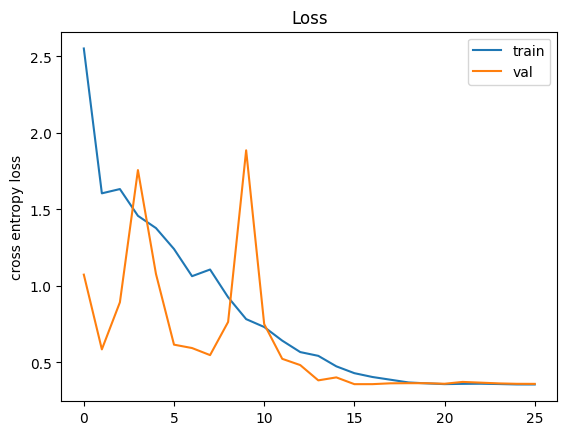

In [99]:
plt.figure()
plt.plot(history["loss"], label="train")
plt.plot(history["val_loss"], label="val")
plt.ylabel("cross entropy loss")
plt.legend()
plt.title("Loss")
plt.show()
plt.close()

In [100]:
predicted_propabilities_tesnor = neural_network(X_test[features].values)
predicted_propabilities = predicted_propabilities_tesnor.numpy()
predicted_class = (predicted_propabilities>0.5)*1

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
accuracy_score(y_test, predicted_class)

0.8409884678747941

# Tensorflow Bluid in Methods
tensorflow library has a lot of already impleting thing while over us the ability to customise thing.

In [103]:
import tensorflow as tf

In [112]:
tf.__version__

'2.10.0'

In [104]:
input_layer = tf.keras.Input((13,))
layer_1_output = tf.keras.layers.Dense(64, activation='relu')(input_layer)
final_output = tf.keras.layers.Dense(1, activation='sigmoid')(layer_1_output)
neural_network = tf.keras.Model(inputs=input_layer, outputs=final_output)

In [105]:
neural_network.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_6 (Dense)             (None, 64)                896       
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [106]:
lr = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
neural_network.compile(optimizer = optimizer,
                       loss = tf.keras.losses.BinaryCrossentropy(),
                       metrics = "accuracy")

In [107]:
es = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                      patience = 10)

history = neural_network.fit(X_train,
                             y_train,
                             batch_size=256,
                             validation_data=(X_val,y_val),
                             callbacks = es,
                             epochs = 100).history

Epoch 1/100
102/102 [==============================] - 0s 1ms/step - loss: 4.6974 - accuracy: 0.7180 - val_loss: 0.6321 - val_accuracy: 0.7602
Epoch 2/100
102/102 [==============================] - 0s 532us/step - loss: 0.5226 - accuracy: 0.7929 - val_loss: 0.4382 - val_accuracy: 0.8103
Epoch 3/100
102/102 [==============================] - 0s 511us/step - loss: 0.4981 - accuracy: 0.8047 - val_loss: 0.5167 - val_accuracy: 0.7927
Epoch 4/100
102/102 [==============================] - 0s 522us/step - loss: 0.4904 - accuracy: 0.8080 - val_loss: 0.4503 - val_accuracy: 0.8120
Epoch 5/100
102/102 [==============================] - 0s 509us/step - loss: 0.5401 - accuracy: 0.8034 - val_loss: 0.4754 - val_accuracy: 0.8141
Epoch 6/100
102/102 [==============================] - 0s 502us/step - loss: 0.4674 - accuracy: 0.8120 - val_loss: 0.4857 - val_accuracy: 0.8200
Epoch 7/100
102/102 [==============================] - 0s 506us/step - loss: 0.5462 - accuracy: 0.8069 - val_loss: 0.4221 - val_accu

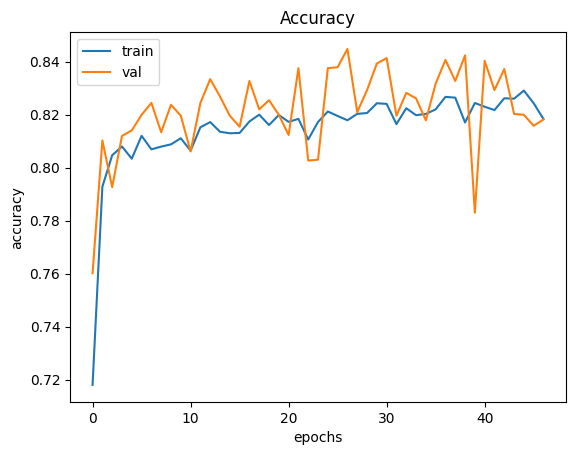

In [108]:
plt.figure()
plt.plot(history["accuracy"], label="train")
plt.plot(history["val_accuracy"], label="val")
plt.ylabel("accuracy")
plt.legend()
plt.title("Accuracy")
plt.xlabel("epochs")
plt.show()
plt.close()

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
predicted_propabilities_tesnor = neural_network(X_test[features].values)
predicted_propabilities = predicted_propabilities_tesnor.numpy()
predicted_class = (predicted_propabilities>0.5)*1

In [111]:
accuracy_score(y_test,predicted_class)

0.8184514003294893

# Implement your own network

try to impmenet a network with the following architeture:  
2 dense layer with 124, 64 units respectively.

then train the network using:  
epochs = 500  
patience = 50  
lr=0.001